In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, sin, exp 
from sympy.abc import x,y 
from sympy.utilities.lambdify import lambdify, implemented_function


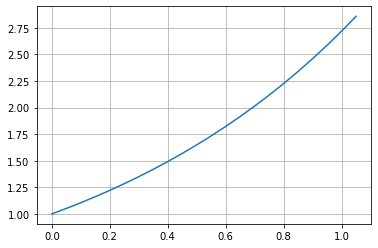

In [60]:
xlist = np.arange(0,1.1,.05)

f = implemented_function('f', lambda x: exp(x))
lam_f = lambdify(x, f(x))

y=[lam_f(x) for x in xlist]
y = np.array(y,dtype=np.float64)
plt.grid()
plt.plot(xlist,y)

0.550778437755155 1.10517091807565 1.64872127070013


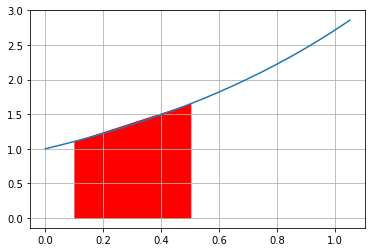

In [61]:

def trapezio(xk,yk,x0,x1,cor='red'):
    assert x1>x0
    xk = np.array(xk,dtype=np.float64)
    yk = np.array(yk,dtype=np.float64)

    dx = x1-x0
    area =((lam_f(x0))+lam_f(x1)) *dx/2
    print(area,lam_f(x0),lam_f(x1))
    plt.plot(xlist,y)
    plt.grid()
    
    plt.fill_between(np.array([x0,x1],dtype=np.float64),np.array([lam_f(x0),lam_f(x1)],dtype=np.float64),color = cor)
    #plt.yticks(np.arange(0,max(yk),max(yk)/15))
    return area
a = trapezio(xlist,y,0.1,.5)


[0.    0.105 0.21  0.315 0.42  0.525 0.63  0.735 0.84  0.945 1.05 ]
0.110812307043675 1 1.11071061035571
0.123080405191404 1.11071061035571 1.23367805995674
0.136706711972971 1.23367805995674 1.37025931095700
0.151841595495221 1.37025931095700 1.52196155561863
0.168652071209881 1.52196155561863 1.69045884837909
0.187323644951280 1.69045884837909 1.87761057926434
0.208062360017892 1.87761057926434 2.08548199250503
0.231097070887521 2.08548199250503 2.31636697678109
0.256681968656894 2.31636697678109 2.57281337858833
0.285099386074203 2.57281337858833 2.85765111806316


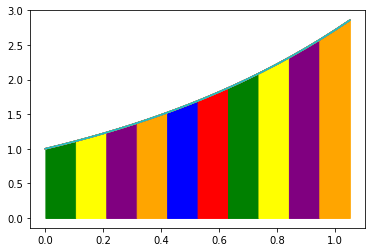

erro=0.0009646875000000003


1.85935752150094

In [64]:
def trapezios_repetidos(xk,yk,inicio,fim,points):
    space = np.linspace(inicio,fim,points+1)
    print(space)
    soma = 0
    cores = ('r','green','yellow','purple','orange','blue')
    for i,c in enumerate(space):
        if i == 0: continue

        soma += trapezio(xk,yk,space[i-1],c,cor = cores[i%len(cores)])
    plt.show()
    erro = (space[1]-space[0])**3/12*points
    print(f'{erro=}')
    return soma
trapezios_repetidos(xlist,y,xlist[0],xlist[-1],10)

# Método de Simpson

In [77]:
def simpson(xk,func,intervalos=10):

    def passo(xk,func):
        h = xk[1]-xk[0]
        return (func(xk[0])+4*func(xk[len(xk)//2])+func(xk[-1]))*h/3
    
    xk = np.linspace(xk[0],xk[-1],intervalos+1,dtype = 'float64')
    print(xk)
    soma = 0
    for c in range(0,len(xk)-1,2):
        print(xk[c:c+3])
        soma+=passo(xk[c:c+3],func)
    return soma
simpson(,lambda i:np.exp(i))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2]
[0.2 0.3 0.4]
[0.4 0.5 0.6]
[0.6 0.7 0.8]
[0.8 0.9 1. ]


1.7182827819248232